In [2]:
# Import necessary libraries

import numpy as np  # Importing numpy library for numerical operations (currently not used)
import cv2  # Importing OpenCV library for computer vision tasks (currently not used)
from tensorflow.compat.v1 import ragged  # Import the compat.v1 module for RaggedTensorValue (unused duplicate import)
from keras_preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator for data augmentation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs and images (used for plotting training history)


In [3]:
# pip install Keras-Preprocessing

In [4]:
# Dataset directories
train_dir = 'data/train'  # Directory path for training data
val_dir = 'data/test'  # Directory path for validation data

# Image Data generators
# Create data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)  # Data generator for training data with pixel normalization
val_datagen = ImageDataGenerator(rescale=1./255)  # Data generator for validation data with pixel normalization


In [5]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(48, 48),
  batch_size=64,
  color_mode='grayscale',
  class_mode='categorical'
)  # Generating batches of augmented training data

validation_generator = val_datagen.flow_from_directory(
  val_dir,
  target_size=(48, 48),
  batch_size=64,
  color_mode='grayscale',
  class_mode='categorical'
)  # Generating batches of augmented validation data

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [2]:
# CNN Model
# Build a convolutional neural network model
model=tf.keras.models.Sequential([
    # Ideal input shape
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Prevent overfitting
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    #Layers with 1024 neurons
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    #Dense with posible classes
    tf.keras.layers.Dense(7, activation='softmax')
])

In [7]:
# Function to display training history
# Plot training and validation accuracy and loss over epochs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [10]:
# Compile, fit and save model
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric

model.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model to the training data and validate on the validation data

history = model.fit(
    train_generator,
    epochs=50,
    validation_data = validation_generator,
    verbose = 1
)

# Save the trained model weights to a file
model.save_weights("test50.h5")

Epoch 1/50
449/449 [==============================] - 975s 2s/step - loss: 1.7554 - accuracy: 0.2814 - val_loss: 1.6004 - val_accuracy: 0.3957
Epoch 2/50
449/449 [==============================] - 961s 2s/step - loss: 1.4878 - accuracy: 0.4227 - val_loss: 1.3329 - val_accuracy: 0.4919
Epoch 3/50
449/449 [==============================] - 974s 2s/step - loss: 1.3279 - accuracy: 0.4903 - val_loss: 1.2400 - val_accuracy: 0.5261
Epoch 4/50
449/449 [==============================] - 998s 2s/step - loss: 1.2339 - accuracy: 0.5333 - val_loss: 1.1837 - val_accuracy: 0.5460
Epoch 5/50
449/449 [==============================] - 1029s 2s/step - loss: 1.1779 - accuracy: 0.5510 - val_loss: 1.1577 - val_accuracy: 0.5564
Epoch 6/50
449/449 [==============================] - 1120s 2s/step - loss: 1.1255 - accuracy: 0.5729 - val_loss: 1.1254 - val_accuracy: 0.5794
Epoch 7/50
449/449 [==============================] - 1108s 2s/step - loss: 1.0750 - accuracy: 0.5937 - val_loss: 1.1043 - val_accuracy: 0.5

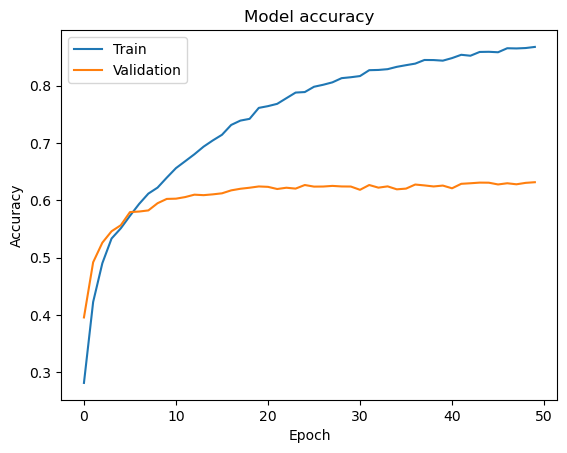

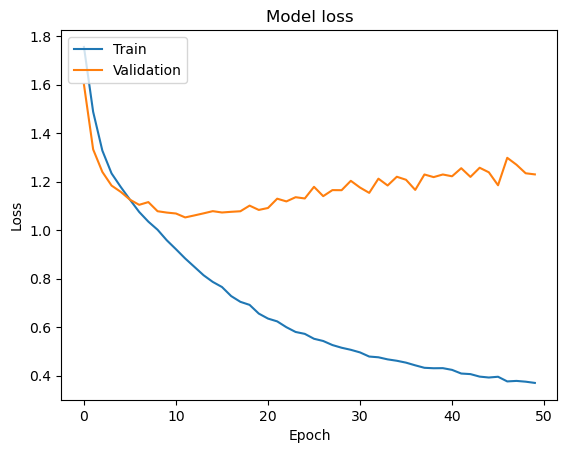

In [11]:
# Plot and visualize the training histor
plot_training_history(history)